In [1]:
import os
import pandas as pd
import numpy as np
import mygene
import gseapy as gp
import gseapy.plot as gseaplot

from gseapy import enrichment_map
import networkx as nx

%matplotlib inline
%config InlineBackend.figure_format='retina' 
%load_ext autoreload
%autoreload 2
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt

from gseapy.plot import barplot, dotplot

In [2]:
! pwd

/Users/sofialuk/Desktop/thesis/h1299/GSEA_H1299


In [3]:
def get_top_ranked_genes(DEG, state):
    '''
    This function takes a DEG file path and number of genes as input and returns a list of top-ranked genes 
    with their ranks based on the DEG file.
    '''
    # Read the DEG file and calculate rank
    Calu3_12h_DEGs = pd.read_csv(DEG, sep=',')
    Calu3_12h_DEGs['log2FoldChange'] = np.log2(Calu3_12h_DEGs['norm_foldChange']) 
    
    if state == 'up':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] > 0.5) & (Calu3_12h_DEGs['pvalue.adj.FDR'] < 0.05)]
    if state == 'down':
        Calu3_12h_DEGs = Calu3_12h_DEGs[(Calu3_12h_DEGs['log2FoldChange'] < -0.5) & (Calu3_12h_DEGs['pvalue.adj.FDR'] < 0.05)]
        
    Calu3_12h_DEGs['Rank'] = -np.log10(Calu3_12h_DEGs['pvalue.adj.FDR'])*Calu3_12h_DEGs.log2FoldChange
    Calu3_12h_DEGs = Calu3_12h_DEGs.sort_values('Rank', ascending=False)
    ranking = pd.DataFrame(Calu3_12h_DEGs['Rank'])


    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(ranking.index, scopes='ensembl.gene')


    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format
    df = df.set_index('query')
    df['rank'] = ranking['Rank']
    df = df.reset_index(drop=True)
    df = df.dropna(subset='symbol')
    
    
    return df[['symbol','rank']]

In [4]:
def enrich_genes(top_ranked_genes):

    enr_Reactome = gp.enrichr(gene_list=top_ranked_genes,
                                 gene_sets=['Reactome_2022'],
                                 organism='Human')
                                 #cutoff=0.25)
    
    enr_GOBP = gp.enrichr(gene_list=top_ranked_genes,
                             gene_sets=['GO_Biological_Process_2021'],
                             organism='Human')
                             #cutoff=0.25)
    
    enr_GOMF = gp.enrichr(gene_list=top_ranked_genes ,
                             gene_sets=['GO_Molecular_Function_2021'],
                             organism='Human')
                             #cutoff=0.25)
    
    
    # Write results to CSV files
    #file_name = os.path.basename(file_path).split('.')[0]
    #enr_Reactome_up.results.to_csv(f'{file_name}_enr_Reactome.csv')
    
    return enr_Reactome, enr_GOBP, enr_GOMF

In [5]:
DEG_36 = '/Users/sofialuk/Desktop/thesis/h1299/h1299_desingle/desingle_h1299_36h.csv'
DEG_24 = '/Users/sofialuk/Desktop/thesis/h1299/h1299_desingle/desingle_h1299_24h.csv'
DEG_12 = '/Users/sofialuk/Desktop/thesis/h1299/h1299_desingle/desingle_h1299_12h.csv'

In [6]:
DEGs_up_36 = get_top_ranked_genes(DEG_36, 'up')
DEGs_down_36 = get_top_ranked_genes(DEG_36, 'down')


DEGs_up_24 = get_top_ranked_genes(DEG_24, 'up')
DEGs_down_24 = get_top_ranked_genes(DEG_24, 'down')


DEGs_up_12 = get_top_ranked_genes(DEG_12, 'up')
DEGs_down_12 = get_top_ranked_genes(DEG_12, 'down')

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


querying 1-1000...done.
querying 1001-2000...done.
querying 2001-2511...done.
Finished.
6 input query terms found no hit:
	['ENSG00000112096', 'ENSG00000256618', 'ENSG00000244693', 'ENSG00000256045', 'ENSG00000255823', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-407...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
Finished.
querying 1-71...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
Finished.
querying 1-1000...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-7768...done.
Finished.
8 input query terms found no hit:
	['ENSG00000271043', 'ENSG00000256222', 'ENSG00000255823', 'ENSG00000255633', 'ENSG00000256618', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
querying 1-58...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
Finished.
querying 1-1000...

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-10873...done.
Finished.
10 input query terms found no hit:
	['ENSG00000255823', 'ENSG00000270672', 'ENSG00000271043', 'ENSG00000255633', 'ENSG00000256618', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [7]:
enr_Reactome_up_36, enr_GOBP_up_36, enr_GOMF_up_36 = enrich_genes(DEGs_up_36)
enr_Reactome_up_24, enr_GOBP_up_24, enr_GOMF_up_24 = enrich_genes(DEGs_up_24)
enr_Reactome_up_12, enr_GOBP_up_12, enr_GOMF_up_12 = enrich_genes(DEGs_up_12)

In [8]:
enr_Reactome_down_36, enr_GOBP_down_36, enr_GOMF_down_36 = enrich_genes(DEGs_down_36)
enr_Reactome_down_24, enr_GOBP_down_24, enr_GOMF_down_24 = enrich_genes(DEGs_down_24)
enr_Reactome_down_12, enr_GOBP_down_12, enr_GOMF_down_12 = enrich_genes(DEGs_down_12)

In [9]:
enr_Reactome_up_24.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Response Of EIF2AK1 (HRI) To Heme Deficiency R...,3/15,0.000019,0.001854,0,0,73.224265,796.344069,DDIT3;ASNS;CHAC1
1,Reactome_2022,ATF4 Activates Genes In Response To Endoplasmi...,2/27,0.004118,0.187934,0,0,23.077101,126.748133,DDIT3;ASNS
2,Reactome_2022,PERK Regulates Gene Expression R-HSA-381042,2/32,0.005753,0.187934,0,0,19.226087,99.168559,DDIT3;ASNS
3,Reactome_2022,PKA-mediated Phosphorylation Of Key Metabolic ...,1/5,0.017626,0.205410,0,0,71.160714,287.373896,MLXIPL
4,Reactome_2022,Defective LFNG Causes SCDO3 R-HSA-5083630,1/5,0.017626,0.205410,0,0,71.160714,287.373896,NOTCH3
...,...,...,...,...,...,...,...,...,...,...
93,Reactome_2022,Transport Of Small Molecules R-HSA-382551,1/706,0.922397,0.961647,0,0,0.389544,0.031467,SLC6A9
94,Reactome_2022,Disease R-HSA-1643685,3/1736,0.952389,0.982464,0,0,0.463223,0.022597,NOTCH3;CCND2;ADM2
95,Reactome_2022,Infectious Disease R-HSA-5663205,1/961,0.969877,0.983815,0,0,0.282277,0.008634,ADM2
96,Reactome_2022,Immune System R-HSA-168256,3/1943,0.973776,0.983815,0,0,0.409089,0.010871,PIANP;ULBP1;IL9R


# padj < 0,05

In [10]:
for i in ['up','down']:
    for j in [12,24,36]:
        exec(f"enr_Reactome_{i}_{j}.res2d = enr_Reactome_{i}_{j}.res2d[enr_Reactome_{i}_{j}.res2d['Adjusted P-value'] < 0.05]")

In [11]:
df_list = []

for i in ['up','down']:
    for j in [12,24,36]:
        # Filter the rows containing 'Hypoxia' in the 'Term' column
        term_df = eval(f"enr_Reactome_{i}_{j}.res2d[enr_Reactome_{i}_{j}.res2d['Term'].str.contains('hypoxia')]")
        
        # Create a new dataframe with two columns
        df = pd.DataFrame({
            'Variable': f"enr_Reactome_{i}_{j}",
            'Term': eval(f"enr_Reactome_{i}_{j}.res2d['Term'][enr_Reactome_{i}_{j}.res2d['Term'].str.contains('Hypoxia')]")
        })
        
        # Add the dataframe to the list
        df_list.append(df)

# Concatenate all the dataframes in the list
result_df = pd.concat(df_list, ignore_index=True)
result_df

,Variable,Term
0,enr_Reactome_down_12,Oxygen-dependent Proline Hydroxylation Of Hypo...
1,enr_Reactome_down_12,Cellular Response To Hypoxia R-HSA-1234174
2,enr_Reactome_down_24,Oxygen-dependent Proline Hydroxylation Of Hypo...
3,enr_Reactome_down_24,Cellular Response To Hypoxia R-HSA-1234174


In [12]:
enr_Reactome_down_24.res2d[enr_Reactome_down_24.res2d.Term.str.contains('Hypoxia')].Genes[73]

'PSMD10;PSMD12;PSMD11;PSMD14;PSMD13;UBE2D2;UBE2D3;CUL2;UBE2D1;HIF1A;PSMA7;PSMD8;PSMB6;PSMD9;PSMB7;PSMD6;PSMB4;PSMB5;PSMB2;UBB;PSMD5;PSMD2;PSMD3;PSMB1;UBC;ELOC;PSMF1;EGLN1;WTIP;RBX1;PSMA5;PSMA6;PSMA3;PSMC5;PSMA4;PSMC6;PSMA1;PSMA2;PSMC4;PSME3;PSMC1;PSME4;PSMC2;PSME1;PSME2;AJUBA;UBA52'

In [15]:
word_set = enr_Reactome_down_24.res2d[enr_Reactome_down_24.res2d.Term.str.contains('Hypoxia')].Genes[73]
word_list = word_set.split(';')

# hypoxic pathways 

In [16]:
DEG_filenames = [DEG_24, DEG_36, DEG_12]

for DEG_filename in DEG_filenames:
    deg = pd.read_csv(DEG_filename)

    mg = mygene.MyGeneInfo()
    geneSyms = mg.querymany(deg.index, scopes='ensembl.gene')

    df = pd.DataFrame(geneSyms)  # Convert annotation of genes into readable format
    df = df.set_index('query')
    
    
    deg['symbol'] = df['symbol']

    word_set = enr_Reactome_down_24.res2d[enr_Reactome_down_24.res2d.Term.str.contains('Hypoxia')].Genes[73]
    word_list = word_set.split(';')

    hypoxic_genes = deg[deg.symbol.isin(word_list)]
    print("Current DEG value: ", DEG_filename)
    print(np.log2(hypoxic_genes[hypoxic_genes['symbol'] == 'EGLN1'].norm_foldChange))

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-15642...done.
Finished.
20 input query terms found no hit:
	['ENSG00000112096', 'ENSG00000168078', 'ENSG00000225178', 'ENSG00000256618', 'ENSG00000189144', 'ENS
Pass "returnall=True" to return complete lists of duplicate or missing query terms.
Current DEG value:  /Users/sofialuk/Desktop/thesis/h1299/h1299_desingle/desingle_h1299_24h.csv
ENSG00000135766   -1.085924
Name: norm_foldChange, dtype: float64
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
queryin

No enriched terms found for GO Reactome, 12 hpi 1 (upregulated). Subplot left blank.


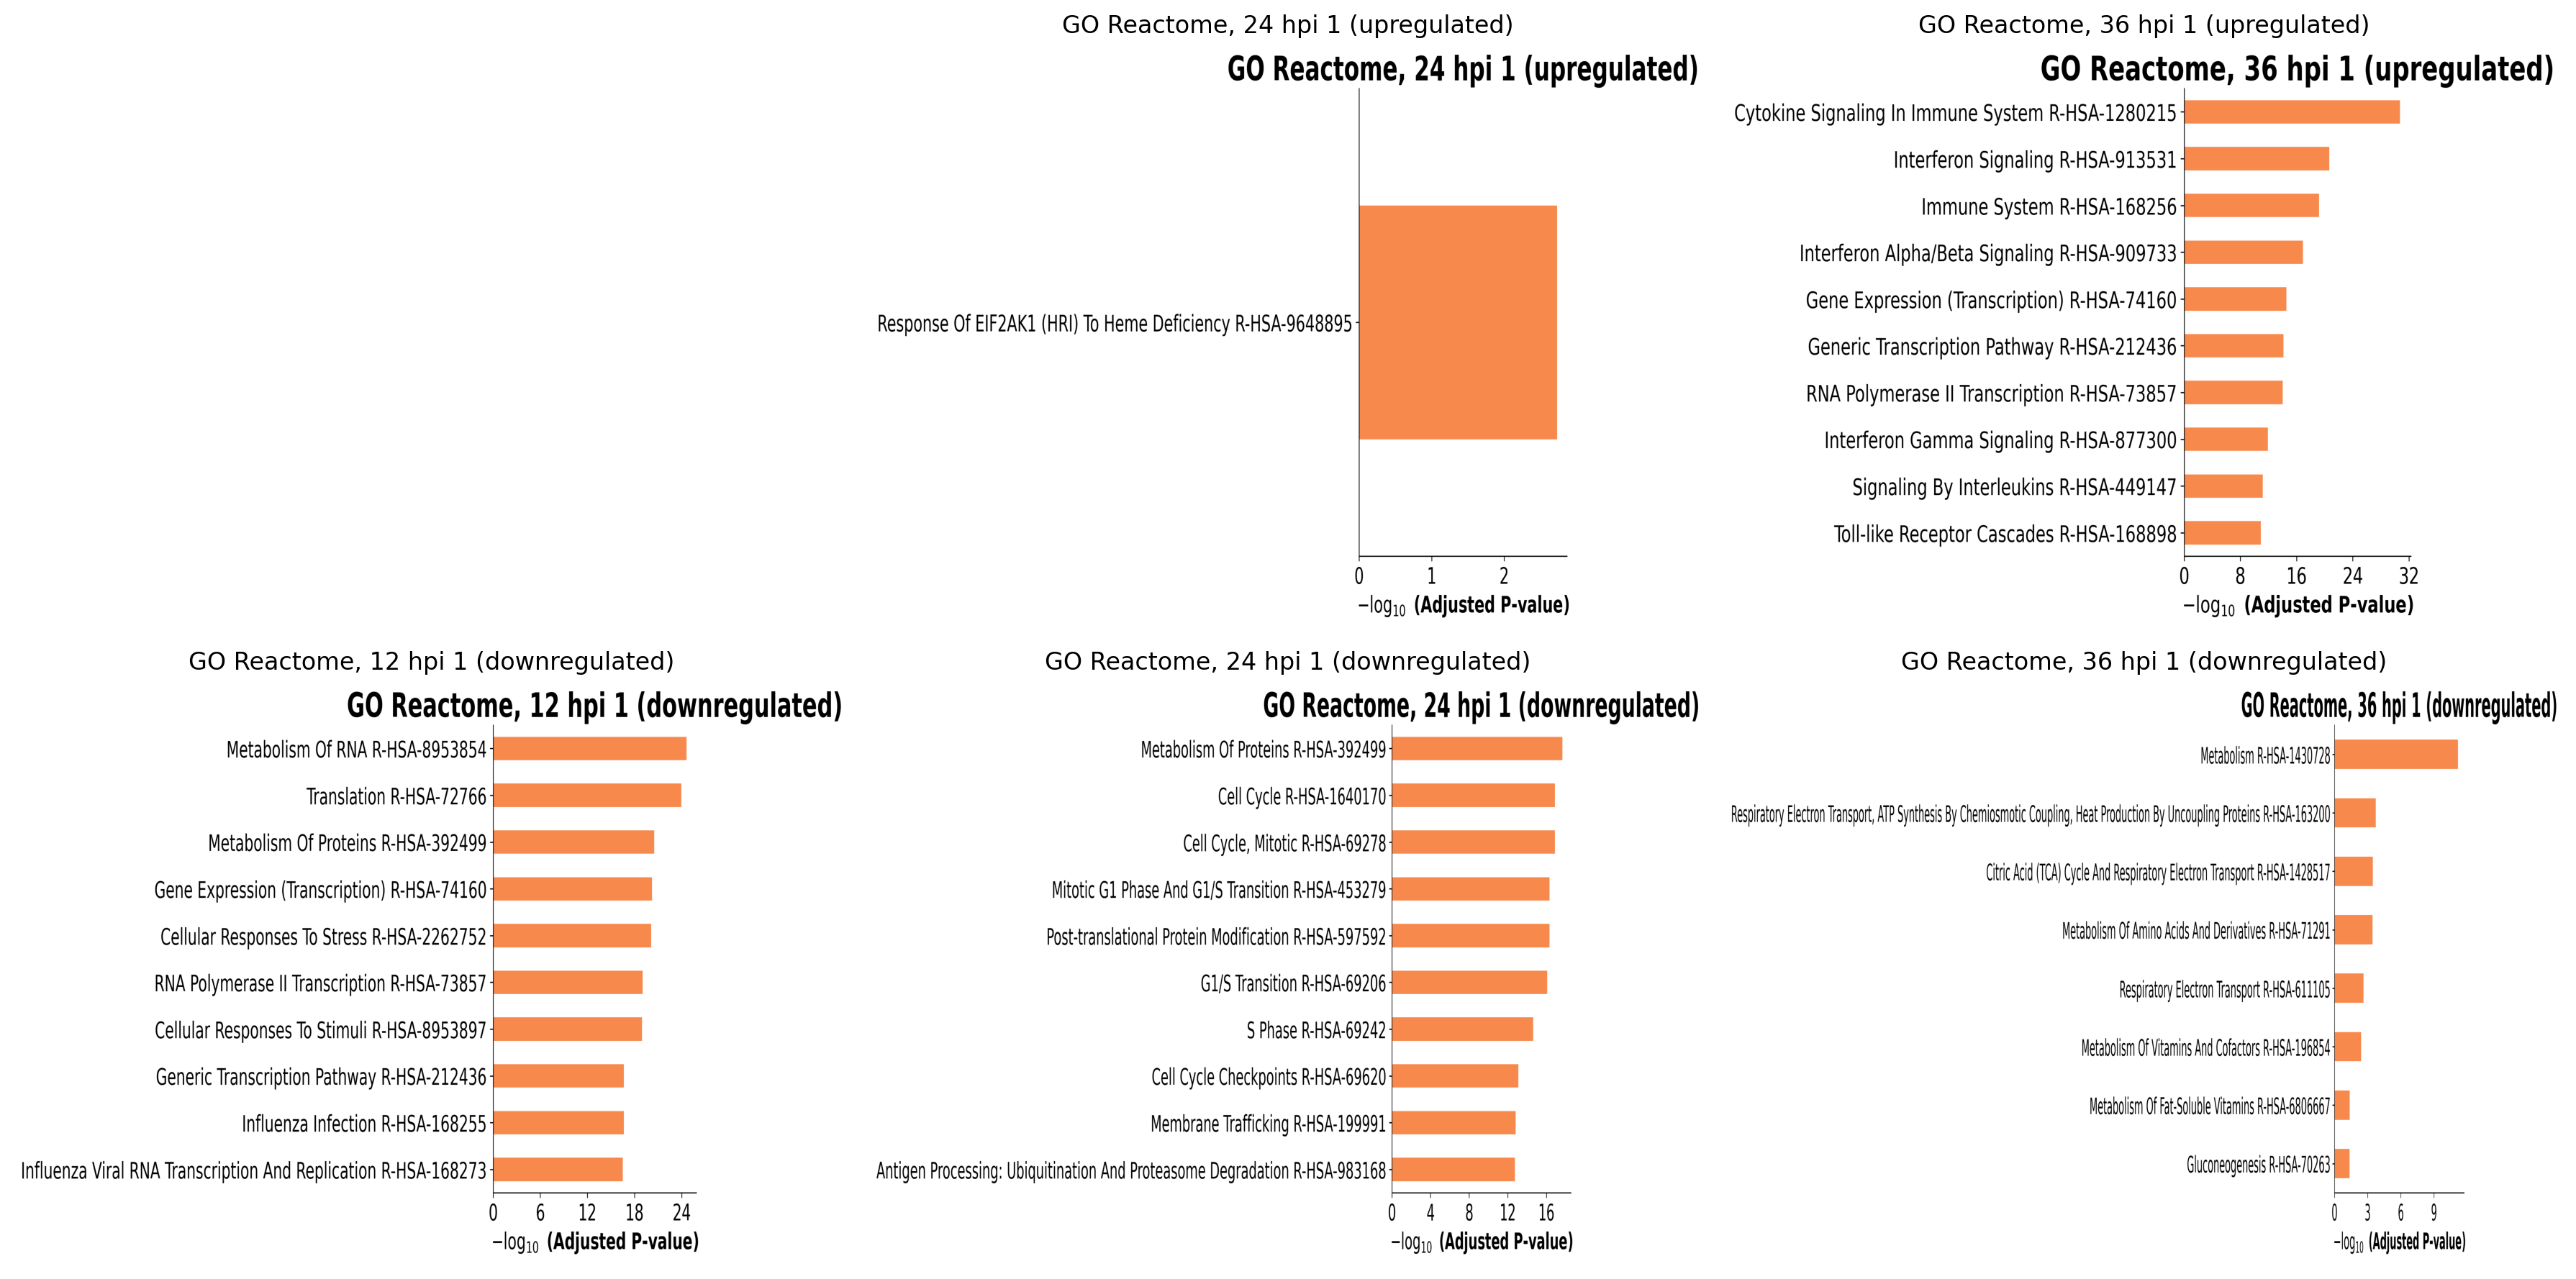

In [17]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))

# Define a function to handle plotting with error checking
def plot_barplot(enr, title, color, buf):
    try:
        barplot(enr.res2d, title=title, color=color, ofname=buf)
        buf.seek(0)
        img = Image.open(buf)
        axs[i, j].imshow(img, aspect='auto')
        axs[i, j].set_title(title)
    except ValueError as e:
        if str(e) == 'Warning: No enrich terms when cutoff = 0.05':
            print(f'No enriched terms found for {title}. Subplot left blank.')
        else:
            raise e

# Loop over conditions and timepoints
for i, cond in enumerate(['up', 'down']):
    for j, timepoint in enumerate([12, 24, 36]):
        buf = BytesIO()
        title = f'GO Reactome, {timepoint} hpi 1 ({cond}regulated)'
        enr = globals().get(f'enr_Reactome_{cond}_{timepoint}')
        plot_barplot(enr, title, '#F66111', buf)

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.savefig('GO_Reactome_H1299.png', dpi=300)


plt.show()


No enriched terms found for GO Molecular Function, 12 hpi 1 (upregulated). Subplot left blank.
No enriched terms found for GO Molecular Function, 24 hpi 1 (upregulated). Subplot left blank.


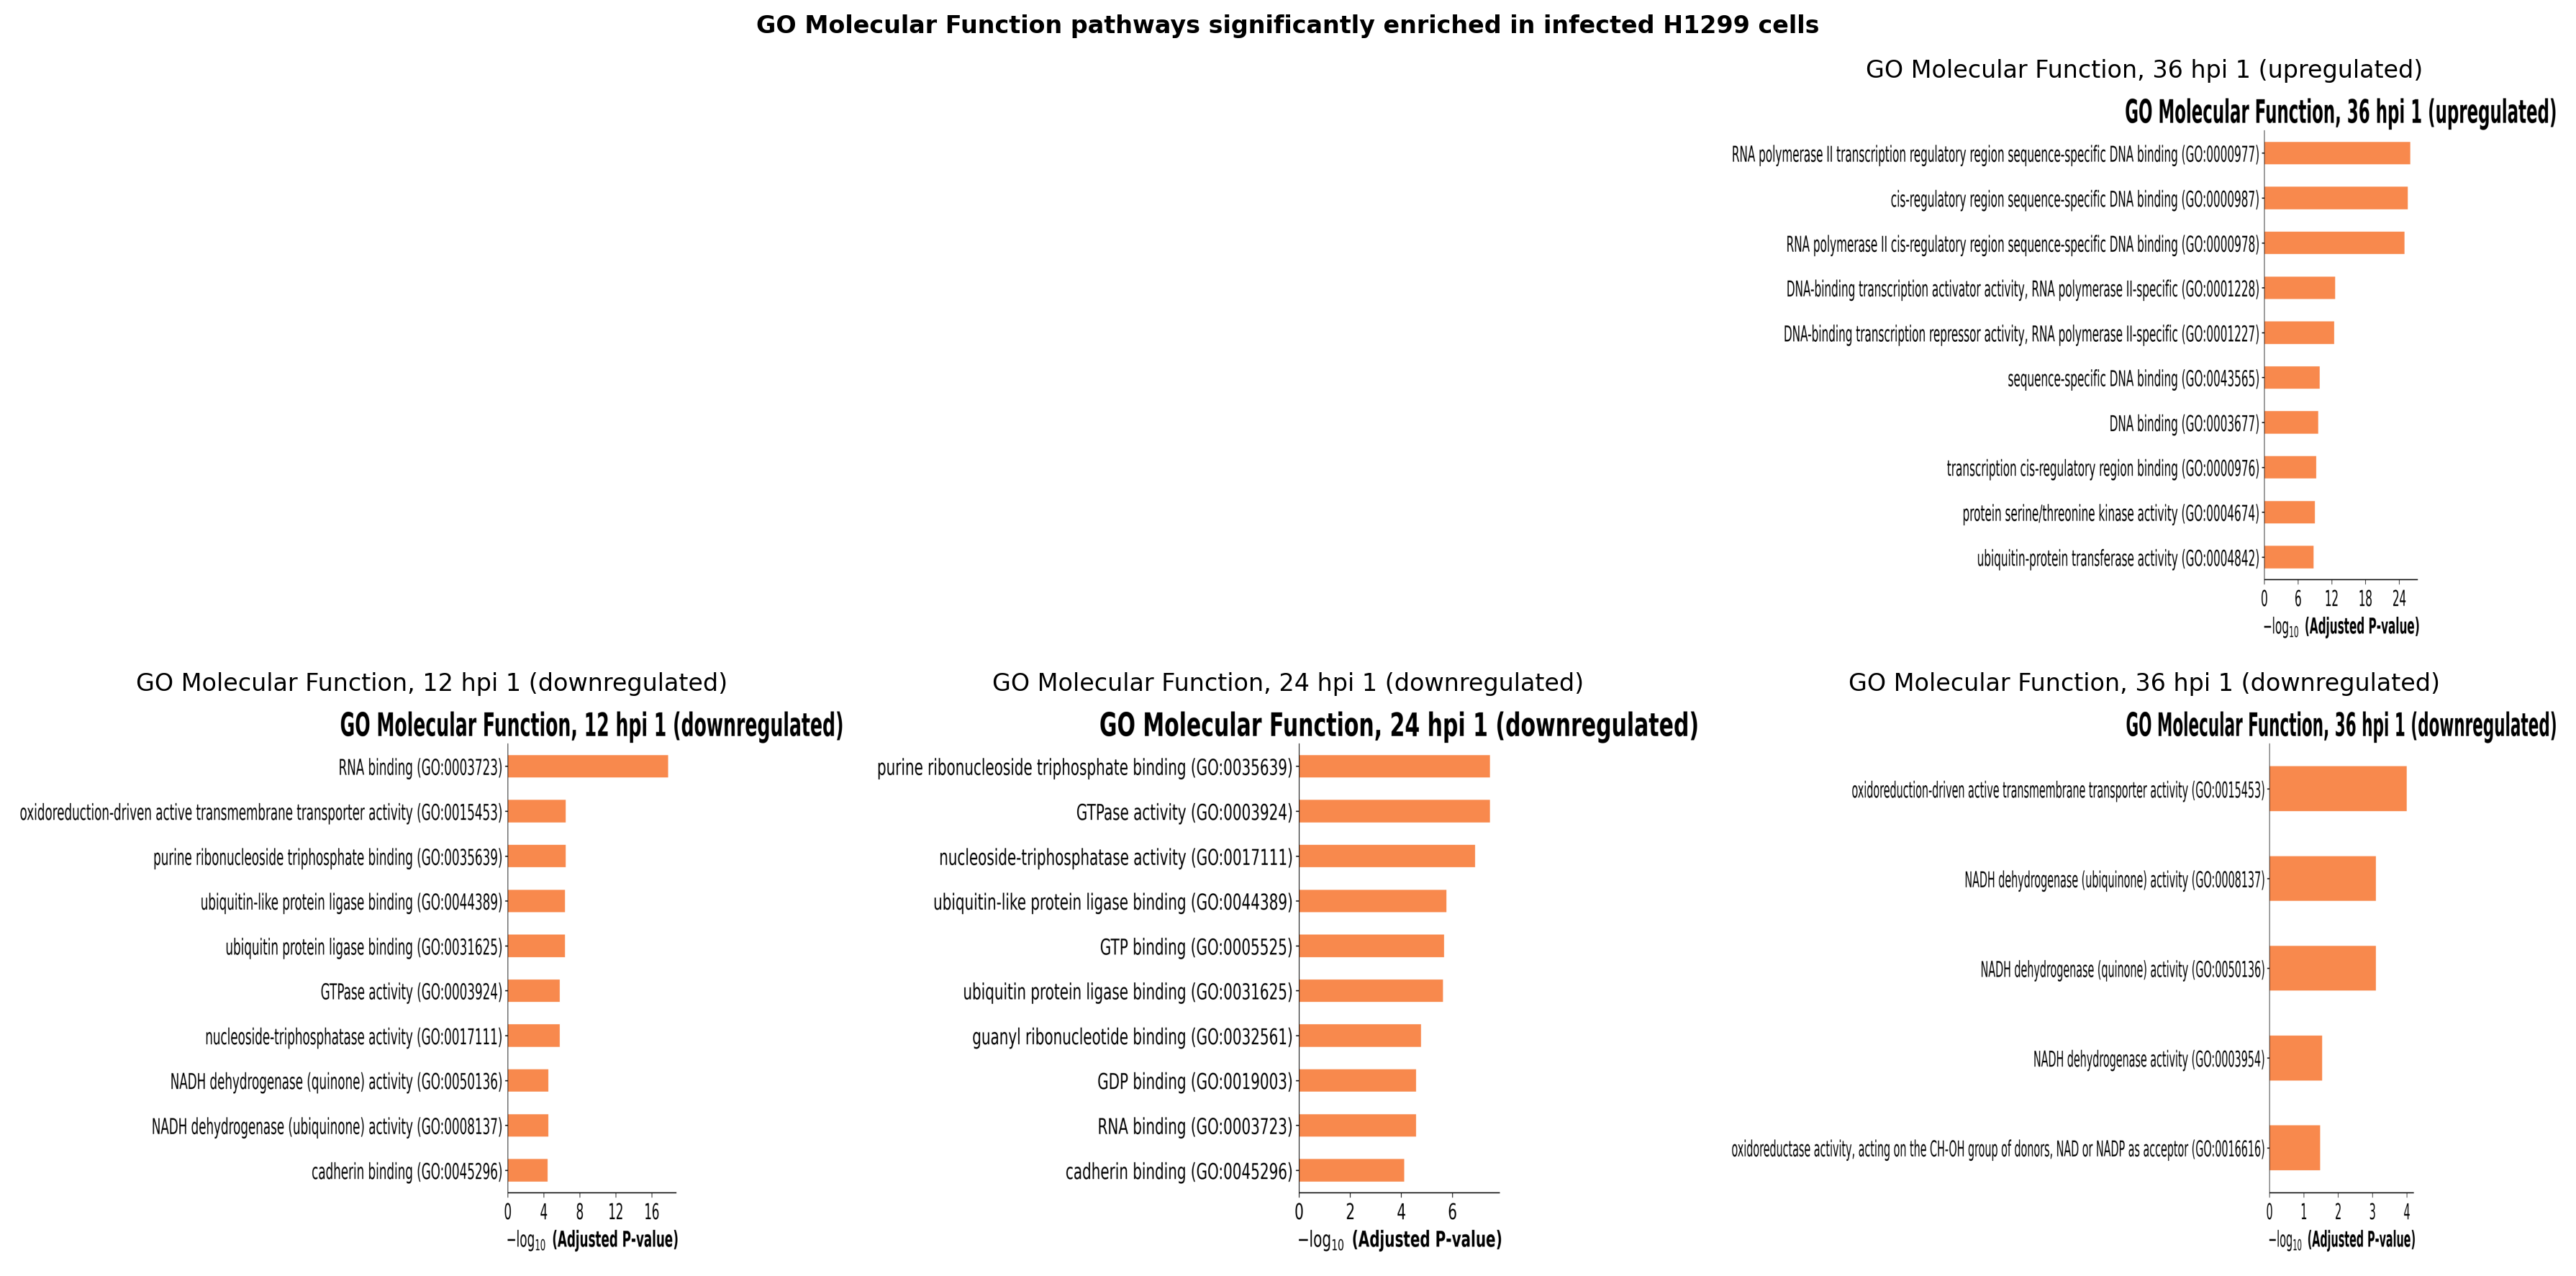

In [18]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 9))

plt.suptitle('GO Molecular Function pathways significantly enriched in infected H1299 cells', fontweight="bold")


# Define a function to handle plotting with error checking
def plot_barplot(enr, title, color, buf):
    try:
        barplot(enr.res2d, title=title, color=color, ofname=buf)
        buf.seek(0)
        img = Image.open(buf)
        axs[i, j].imshow(img, aspect='auto')
        axs[i, j].set_title(title)
    except ValueError as e:
        if str(e) == 'Warning: No enrich terms when cutoff = 0.05':
            print(f'No enriched terms found for {title}. Subplot left blank.')
        else:
            raise e

# Loop over conditions and timepoints
for i, cond in enumerate(['up', 'down']):
    for j, timepoint in enumerate([12, 24, 36]):
        buf = BytesIO()
        title = f'GO Molecular Function, {timepoint} hpi 1 ({cond}regulated)'
        enr = globals().get(f'enr_GOMF_{cond}_{timepoint}')
        plot_barplot(enr, title, '#F66111', buf)

# Remove axes labels
for ax in axs.ravel():
    ax.axis('off')

plt.tight_layout()
plt.savefig('GO_MF_H1299.png', dpi=300)



plt.show()



In [19]:
import matplotlib.pyplot as plt
from gseapy.plot import barplot
from io import BytesIO
from PIL import Image

def plot_enrichment(enrichment_variable):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

    # Define a function to handle plotting with error checking
    def plot_barplot(enr, title, color, buf):
        try:
            barplot(enr.res2d, title=title, color=color, ofname=buf)
            buf.seek(0)
            img = Image.open(buf)
            axs[i, j].imshow(img, aspect='auto')
            axs[i, j].set_title(title)
        except ValueError as e:
            if str(e) == 'Warning: No enrich terms when cutoff = 0.05':
                print(f'No enriched terms found for {title}. Subplot left blank.')
            else:
                raise e

    # Loop over conditions and timepoints
    for i, cond in enumerate(['up', 'down']):
        for j, timepoint in enumerate([12, 24, 36]):
            buf = BytesIO()
            title = f'GO Reactome, {timepoint} hpi 1 ({cond}regulated)'
            enr = globals().get(f'{enrichment_variable}_{cond}_{timepoint}')
            plot_barplot(enr, title, '#F66111', buf)

    # Remove axes labels
    for ax in axs.ravel():
        ax.axis('off')
        
    plt.suptitle('GO Reactome pathways significantly enriched in infected H1299 cells', fontweight="bold")

    

    plt.tight_layout()
    plt.savefig('GO_Reactome_H1299.png', dpi=300)

    plt.show()

In [20]:
DEGs_up_36.to_csv('single_h1299_DEGs_up_36.csv')
DEGs_up_24.to_csv('single_1299_DEGs_up_24.csv')
DEGs_up_12.to_csv('single_1299_DEGs_up_12.csv')

In [21]:
DEGs_down_36.to_csv('single_h1299_DEGs_down_36.csv')
DEGs_down_24.to_csv('single_1299_DEGs_down_24.csv')
DEGs_down_12.to_csv('single_1299_DEGs_down_12.csv')

In [22]:
enr_Reactome_down_12.res2d[enr_Reactome_down_12.res2d.Term.str.contains('Lipid')]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
244,Reactome_2022,Metabolism Of Lipids R-HSA-556833,447/732,0.000101,0.000743,0,0,1.332917,12.259184,PI4K2B;LIPE;NSDHL;CYP1B1;PIP4K2A;PIP4K2B;MLYCD...
343,Reactome_2022,Regulation Of Lipid Metabolism By PPARalpha R-...,81/118,0.001026,0.005357,0,0,1.847674,12.715631,ALAS1;FHL2;MED19;CCNC;RORA;MIA3;AHR;MED16;MED1...
543,Reactome_2022,Peroxisomal Lipid Metabolism R-HSA-390918,22/29,0.014271,0.047117,0,0,2.646830,11.247690,PECR;ACBD5;ACOT8;PHYH;ACBD4;ECI2;HSD17B4;CROT;...


In [23]:
enr_Reactome_down_36.res2d[enr_Reactome_down_36.res2d.Term.str.contains('Lipid')]



,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes


In [24]:
enr_Reactome_down_24.res2d[enr_Reactome_down_24.res2d.Term.str.contains('Lipid')]


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
208,Reactome_2022,Metabolism Of Lipids R-HSA-556833,333/732,0.000101,0.000850,0,0,1.330596,12.247983,PI4K2B;LPGAT1;CERK;PITPNB;ECI2;GDE1;CCNC;NSDHL...
425,Reactome_2022,Peroxisomal Lipid Metabolism R-HSA-390918,18/29,0.009402,0.038986,0,0,2.584744,12.062606,PECR;ACBD5;PHYH;ECI2;HSD17B4;CROT;ALDH3A2;NUDT...


In [25]:
enr_Reactome_down_12.res2d.head(40)



,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Metabolism Of RNA R-HSA-8953854,498/666,1.329359e-28,2.387529e-25,0,0,2.565044,164.644223,RPL4;POP5;RPL5;RPL30;NUP107;POP7;RPL3;RPL32;RP...
1,Reactome_2022,Translation R-HSA-72766,238/281,1.267212e-27,1.137956e-24,0,0,4.737340,293.397548,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;PARS2;RPL34;R...
2,Reactome_2022,Metabolism Of Proteins R-HSA-392499,1232/1890,5.126378e-24,3.068991e-21,0,0,1.648383,88.398883,NUP107;PGAP1;PSMD8;PSMD9;PSMD6;PSMD4;PSMD5;PSM...
3,Reactome_2022,Gene Expression (Transcription) R-HSA-74160,967/1449,1.347385e-23,6.049758e-21,0,0,1.754635,92.401352,TDRKH;NUP107;EHMT1;NOC2L;RBPJ;LSM10;PSMD8;PSMD...
4,Reactome_2022,Cellular Responses To Stress R-HSA-2262752,520/722,2.163810e-23,7.772407e-21,0,0,2.223822,116.055898,RB1;RPL4;RPL5;RPL30;NUP107;RPL3;RPL32;RPL31;RP...
5,Reactome_2022,RNA Polymerase II Transcription R-HSA-73857,879/1312,3.065098e-22,9.174861e-20,0,0,1.769764,87.668418,EHMT1;NOC2L;RBPJ;LSM10;PSMD8;PSMD9;PSMD6;LSM11...
6,Reactome_2022,Cellular Responses To Stimuli R-HSA-8953897,525/736,4.326468e-22,1.110048e-19,0,0,2.148311,105.679986,RB1;RPL4;RPL5;RPL30;NUP107;RPL3;RPL32;RPL31;RP...
7,Reactome_2022,Influenza Infection R-HSA-168255,138/157,1.128737e-19,2.319197e-17,0,0,6.174869,269.397305,RPL4;RPL5;RPL30;NUP107;RPL3;NUP188;RPL32;RPL31...
8,Reactome_2022,Generic Transcription Pathway R-HSA-212436,795/1190,1.162181e-19,2.319197e-17,0,0,1.747582,76.192522,EHMT1;NOC2L;RBPJ;PSMD8;PSMD9;PSMD6;PSMD4;PSMD5...
9,Reactome_2022,Influenza Viral RNA Transcription And Replicat...,123/137,1.841981e-19,3.104412e-17,0,0,7.462949,321.938744,RPL4;RPL5;RPL30;NUP107;RPL3;NUP188;RPL32;RPL31...


In [26]:
enr_Reactome_down_36.res2d.head(40)



,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2022,Metabolism R-HSA-1430728,95/2049,8.384284e-15,6.766117e-12,0,0,2.748643,89.090180,NDUFA13;CERK;FHL2;DBI;ENO1;ETFB;DNPH1;TM7SF2;P...
1,Reactome_2022,"Respiratory Electron Transport, ATP Synthesis ...",13/112,4.655738e-07,1.878590e-04,0,0,6.497000,94.726236,COX8A;ATP5PF;NDUFA13;NDUFB10;NDUFB6;NDUFA2;ATP...
2,Reactome_2022,Citric Acid (TCA) Cycle And Respiratory Electr...,15/163,1.274439e-06,3.428240e-04,0,0,5.027492,68.238178,COX8A;ATP5PF;NDUFA13;NDUFB10;NDUFB6;IDH2;NDUFA...
3,Reactome_2022,Metabolism Of Amino Acids And Derivatives R-HS...,23/364,1.796306e-06,3.624047e-04,0,0,3.381568,44.737391,GAMT;DDC;HGD;AADAT;GLS2;SHMT1;HOGA1;FAH;ACADSB...
4,Reactome_2022,Respiratory Electron Transport R-HSA-611105,10/90,1.464339e-05,2.363443e-03,0,0,6.143892,68.390862,COX8A;NDUFA13;NDUFS8;NDUFS7;NDUFB10;NDUFB6;NDU...
5,Reactome_2022,Metabolism Of Vitamins And Cofactors R-HSA-196854,14/186,2.889119e-05,3.885865e-03,0,0,4.022339,42.041377,VKORC1;GSTO2;SHMT1;AKR1C3;PARP16;DHFR;GCHFR;RB...
6,Reactome_2022,Metabolism Of Fat-Soluble Vitamins R-HSA-6806667,6/47,3.629651e-04,4.184469e-02,0,0,7.135332,56.520423,VKORC1;RBP4;TTR;AKR1B10;AKR1C3;SDC1
7,Reactome_2022,Gluconeogenesis R-HSA-70263,5/32,4.359054e-04,4.397196e-02,0,0,9.013267,69.745429,TPI1;PGK1;SLC25A10;ENO1;SLC25A11


In [27]:
enr_Reactome_down_12.res2d[enr_Reactome_down_12.res2d.Term.str.contains('Fat')]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
499,Reactome_2022,Mitochondrial Fatty Acid Beta-Oxidation R-HSA-...,27/36,0.008771,0.031378,0,0,2.527132,11.969381,ACAA2;ECHS1;ECI1;DBI;PCTP;MCEE;ACADL;THEM4;ACA...


In [28]:
enr_Reactome_down_36.res2d[enr_Reactome_down_36.res2d.Term.str.contains('Fat')]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
6,Reactome_2022,Metabolism Of Fat-Soluble Vitamins R-HSA-6806667,6/47,0.000363,0.041845,0,0,7.135332,56.520423,VKORC1;RBP4;TTR;AKR1B10;AKR1C3;SDC1
